In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from utils.tools import get_cov, gen_Xgrid
import seaborn as sns
from sklearn import datasets, tree, ensemble
import numpy as np
import pandas as pd
import random
seed = 1853219
random.seed(seed)
np.random.seed(seed)
sns.set_theme()

### A) Clustering Output States

d:\mambaforge\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[3.19462558 1.91429061]
 [7.19831173 7.70619219]
 [2.88507126 6.39672699]]


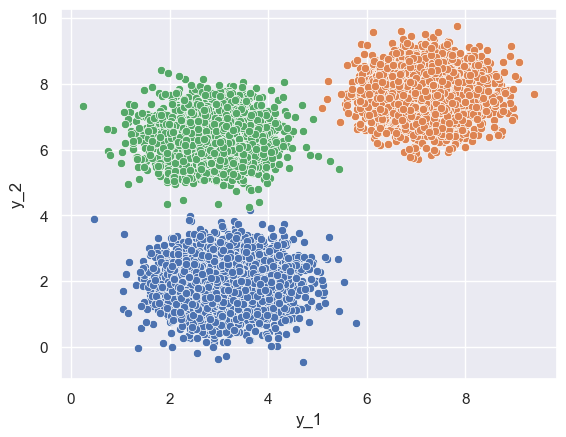

In [3]:
df = pd.read_csv('data/volts.csv')
x1, x2 = df["x1"].to_numpy(), df["x2"].to_numpy()
y1, y2 = df["y1"].to_numpy() , df["y2"].to_numpy()
clusters = 3
X = np.array([x1,x2]).T
Y = np.array([y1,y2]).T
km = KMeans(n_clusters=clusters, random_state=seed)
classifications = km.fit_predict(Y)
labels = set(classifications)

fig, ax = plt.subplots()
for label in labels:
    sns.scatterplot(x = Y[classifications == label, 0], y = Y[classifications == label, 1])

z = classifications

ax.set_xlabel("y_1"); ax.set_ylabel("y_2")
print (km.cluster_centers_)

### B) Random Forest Classifier

In [4]:
rf = ensemble.RandomForestClassifier(n_estimators=100, max_depth=20)
rf.fit(X,z)

RandomForestClassifier(max_depth=20)

Text(0.5, 1.0, 'Random Forest Classifier')

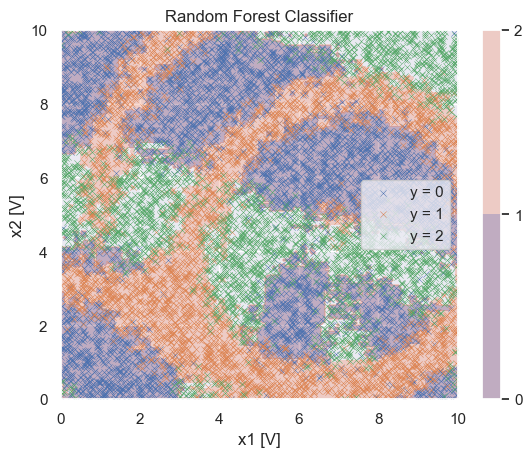

In [32]:
nx = 200
Xgrid, x1, x2 = gen_Xgrid(nx, (0,10)) # 0V to 10V
classifications = rf.predict(Xgrid).reshape([nx,nx])
y_pred = rf.predict(X)
fig, ax = plt.subplots()
levels = [0,0.9999999,1.99999999]
contour = ax.contourf(x1,x2, classifications, levels = levels, alpha = 0.3)
fig.colorbar(contour)
s = 20
sns.scatterplot(x = X[y_pred==0,0], y = X[y_pred==0,1], label = 'y = 0',ax = ax, marker = 'x', s = s)
sns.scatterplot(x = X[y_pred==1,0], y = X[y_pred==1,1], label = 'y = 1', ax = ax, marker = 'x', s = s)
sns.scatterplot(x = X[y_pred==2,0], y = X[y_pred==2,1], label = 'y = 2',ax = ax, marker = 'x', s = s)
ax.set_xlabel('x1 [V]'); ax.set_ylabel('x2 [V]')
ax.set_title ("Random Forest Classifier")
#ax.set_axis_off()

### Nearest Neighbour Approach

In [27]:
k = 1
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit (X,z)

KNeighborsClassifier(n_neighbors=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Nearest Neighbour Classifier')

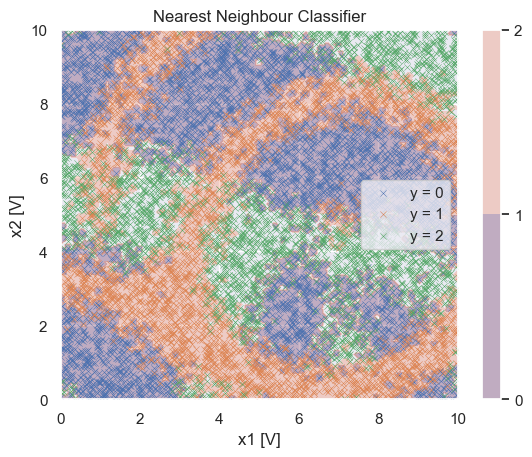

In [33]:
nx = 200
Xgrid, x1, x2 = gen_Xgrid(nx, (0,10))
classifications = classifier.predict(Xgrid).reshape([nx,nx])
y_pred = classifier.predict(X)
fig, ax = plt.subplots()
contour = ax.contourf(x1,x2, classifications.reshape(200,200), levels = [0,0.9999999,1.99999999], alpha = 0.3)
fig.colorbar(contour)
ax.legend()
s = 20
sns.scatterplot(x = X[y_pred==0,0], y = X[y_pred==0,1], label = 'y = 0',ax = ax, marker = 'x', s = s)
sns.scatterplot(x = X[y_pred==1,0], y = X[y_pred==1,1], label = 'y = 1', ax = ax, marker = 'x', s = s)
sns.scatterplot(x = X[y_pred==2,0], y = X[y_pred==2,1], label = 'y = 2',ax = ax, marker = 'x', s = s)
ax.set_xlabel('x1 [V]'); ax.set_ylabel('x2 [V]')
ax.set_title("Nearest Neighbour Classifier")

In [30]:
y_pred.shape

(200, 200)